# Лабораторная работа №9 Дифференцирование и интегрирование

Кобыжев Александр, группа 3530901/80202

### Упражнение 9.2

In [1]:
%matplotlib inline

import thinkdsp
import thinkplot
import thinkstats2

import numpy as np
import pandas as pd
import scipy.signal

# suppress division by zero warning
from warnings import simplefilter
simplefilter('ignore', RuntimeWarning)

PI2 = 2 * np.pi
GRAY = '0.7'

Создадим волну `TriangleSignal`:

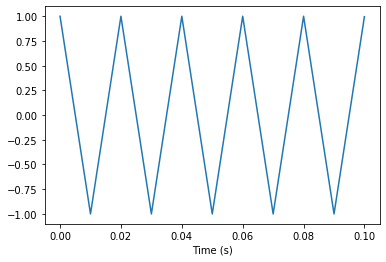

In [2]:
in_wave = thinkdsp.TriangleSignal(freq=50).make_wave(duration=0.1, framerate=44000)
in_wave.plot()
thinkplot.config(xlabel='Time (s)')

`diff` треугольной волны - это прямоугольная волна, что объясняет, почему гармоники в прямоугольной волне уменьшаются как $1/f$, по сравнению с треугольной волной, которая спадает как $1/f2$.

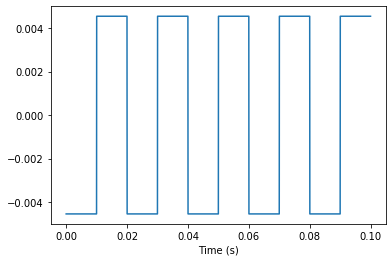

In [3]:
out_wave = in_wave.diff()
out_wave.plot()
thinkplot.config(xlabel='Time (s)')

Когда мы берём спектральную производную, мы получаем "звон" вокруг разрывов:

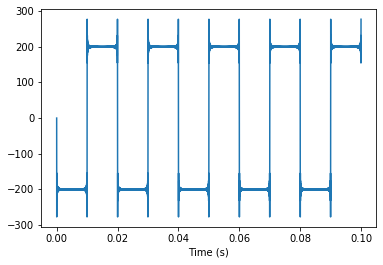

In [4]:
out_wave2 = in_wave.make_spectrum().differentiate().make_wave()
out_wave2.plot()
thinkplot.config(xlabel='Time (s)')

Различия между эффектом `diff` и `differentiate` заключается в том, что производная треугольной волны не определена в точках треугольника.

### Упражнение 9.3

Сделаем волну `SquareSignal`:

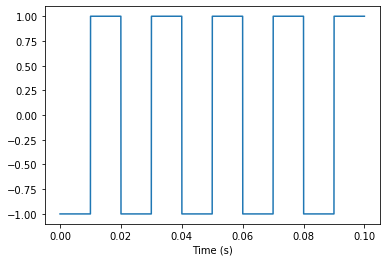

In [5]:
in_wave = thinkdsp.SquareSignal(freq=50).make_wave(duration=0.1, framerate=44000)
in_wave.plot()
thinkplot.config(xlabel='Time (s)')

Совокупная сумма прямоугольной волны - это треугольная волна. После предыдущего выполненного упражнения это не должно вызывать никакого удивления.

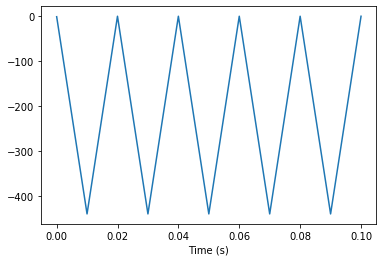

In [6]:
out_wave = in_wave.cumsum()
out_wave.plot()
thinkplot.config(xlabel='Time (s)')

Спектральный интеграл также представляет собой треугольную волну, хотя амплитуда сильно отличается.

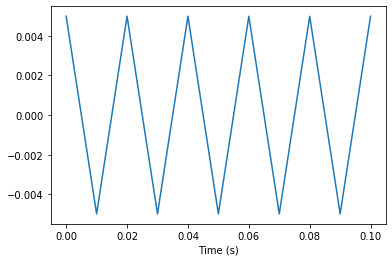

In [7]:
spectrum = in_wave.make_spectrum().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
thinkplot.config(xlabel='Time (s)')

Если уравновесить и нормализовать две волны, они будут визуально похожи.

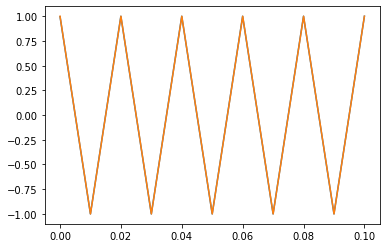

In [8]:
out_wave.unbias()
out_wave.normalize()
out_wave2.normalize()
out_wave.plot()
out_wave2.plot()

In [9]:
max(abs(out_wave.ys - out_wave2.ys))

0.004545454545454519

И они численно похожи, но с точностью около 3 цифр.

### Упражнение 9.4

Создадим `SawtoothSignal` волну.

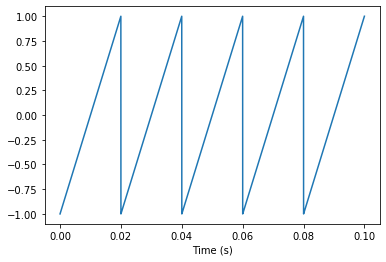

In [10]:
in_wave = thinkdsp.SawtoothSignal(freq=50).make_wave(duration=0.1, framerate=44000)
in_wave.plot()
thinkplot.config(xlabel='Time (s)')

Первая совокупная сумма зубца пилы - это парабола:

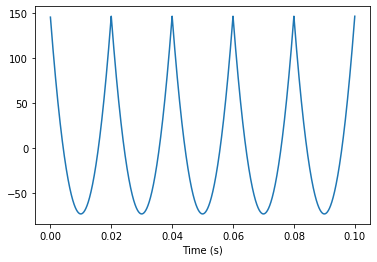

In [11]:
out_wave = in_wave.cumsum()
out_wave.unbias()
out_wave.plot()
thinkplot.config(xlabel='Time (s)')

Вторая совокупная сумма - это кубическая кривая:

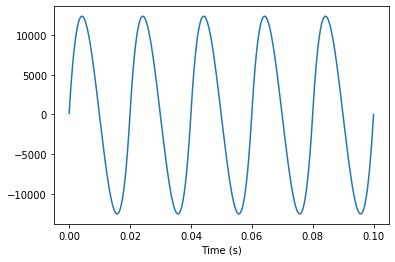

In [12]:
out_wave = out_wave.cumsum()
out_wave.plot()
thinkplot.config(xlabel='Time (s)')

Двойное интегрирование также дает кубическую кривую.

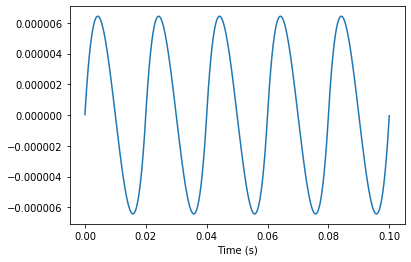

In [13]:
spectrum = in_wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0
out_wave2 = spectrum.make_wave()
out_wave2.plot()
thinkplot.config(xlabel='Time (s)')

На этом этапе результат всё больше и больше напоминает синусоиду. Причина в том, что интеграция действует как фильтр нижних частот. На данный момент мы отфильтровали почти все, кроме основного, как показано в спектре ниже:

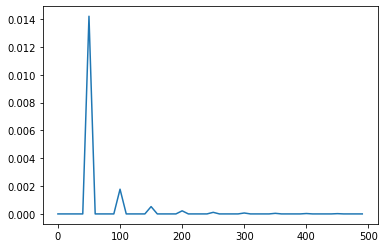

In [14]:
out_wave2.make_spectrum().plot(high=500)

### Упражнение 9.5

Создадим волну `CubicSignal`:

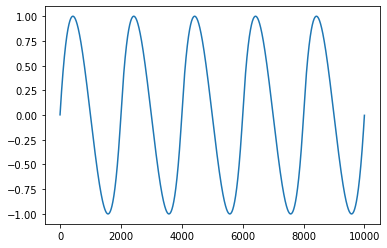

In [15]:
in_wave = thinkdsp.CubicSignal(freq=0.0005).make_wave(duration=10000, framerate=1)
in_wave.plot()

Первый `diff` - парабола, второй - пилообразная волна:

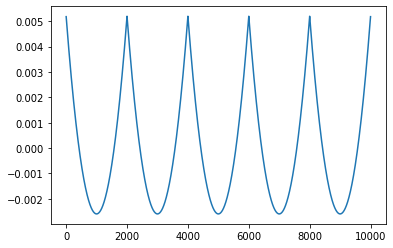

In [16]:
out_wave = in_wave.diff()
out_wave.plot()

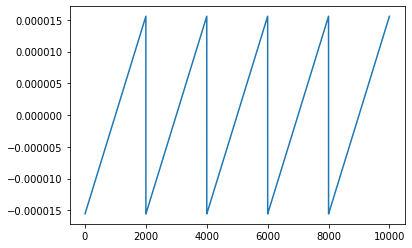

In [17]:
out_wave = out_wave.diff()
out_wave.plot()

Когда мы дифференцируем дважды, получаем пилообразную форму с некоторым звоном. Проблема в том, что производная параболического сигнала в точках не определена.

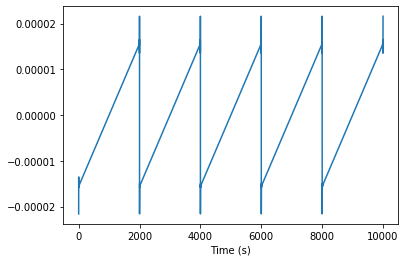

In [18]:
spectrum = in_wave.make_spectrum().differentiate().differentiate()
out_wave2 = spectrum.make_wave()
out_wave2.plot()
thinkplot.config(xlabel='Time (s)')

Окно второй разности -1, 2, -1. Вычисляя ДПФ окна, мы можем найти соответствующий фильтр.

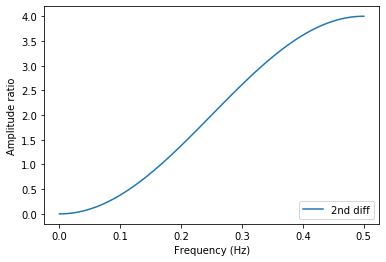

In [19]:
diff_window = np.array([-1.0, 2.0, -1.0])
padded = thinkdsp.zero_pad(diff_window, len(in_wave))
diff_wave = thinkdsp.Wave(padded, framerate=in_wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')

thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio',
                 loc='lower right')

А для второй производной мы можем найти соответствующий фильтр, вычислив фильтр первой производной и возведя его в квадрат.

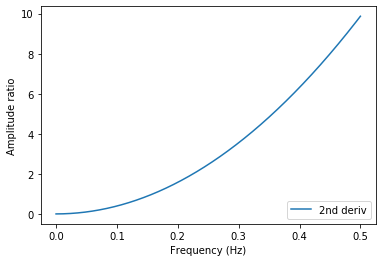

In [20]:
deriv_filter = in_wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot(label='2nd deriv')

thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio',
                 loc='lower right')

Рассмотрим два фильтра в одном масштабе:

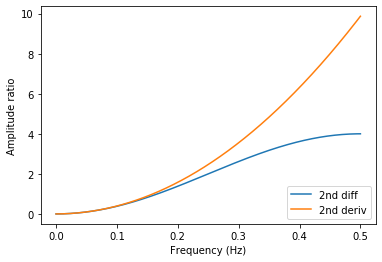

In [21]:
diff_filter.plot(label='2nd diff')
deriv_filter.plot(label='2nd deriv')

thinkplot.config(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio',
                 loc='lower right')

Теперь мы можем видеть, что оба являются фильтрами верхних частот, которые усиливают компоненты самых высоких частот. Второй `deriv` параболический, поэтому он сильнее всего усиливает самые высокие частоты. Второй `diff` - хорошее приближение второй производной только на самых низких частотах, затем он существенно отклоняется.